In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from matplotlib import gridspec
from simulate import simulate
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib
import matplotlib.cm as cm

In [12]:
N = 100
N_ill = 1
Lx = Ly = 30
stepSize = 0.5
infection_rate = 0.01
tile_infection_rate = pollution_rate = 0.005
flow_rate = 0
shuffled_pollution_activate = False
animatable_output = False
centralized_infectious = False
state_after_infection = 1 #1 for SEI, 2 for SI
opening_duration = 0 #flash_forward every ...
sigma_1 = 0.3
sigma_2 = 0
n_sigma_2 = 0
tMax=200

In [13]:
args = N, N_ill, Lx, Ly, stepSize, infection_rate, pollution_rate\
                , tile_infection_rate, flow_rate, tMax,\
                shuffled_pollution_activate, animatable_output,\
                centralized_infectious, state_after_infection,\
                opening_duration, sigma_1, sigma_2, n_sigma_2

In [14]:
timeline = simulate(args = (np.random.randint(10000),)+args)

In [15]:
pollution_history = np.load('Results/pollution_history.npy')
agents_history = np.load('Results/agents_history.npy')
#args = 100, 1, 30, 30, 0.5, 0.01, 0.99, 0.99, 0., 400
#N, N_ill, Lx, Ly, stepSize, infection_rate, pollution_rate, tile_infection_rate, flow_rate, tMax = args


FileNotFoundError: [Errno 2] No such file or directory: 'Results/pollution_history.npy'

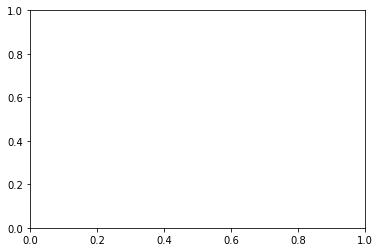

In [16]:
# figure_ratio = 0.75
# fig = plt.figure(figsize=(5*(0.9+figure_ratio), 5 ) )
# fig.subplots_adjust(wspace = 0)
# gs = gridspec.GridSpec(1, 2, width_ratios=[1, figure_ratio]) 
# ax = plt.subplot(gs[0])
# ay = plt.subplot(gs[1])

fig = plt.figure()
ax = fig.add_subplot(111)

alpha = 0.7
def animate(t, create_legend = False):
    ax.clear()
#     walk()
#     update_tile()
#     pollute()
    pollution = pollution_history[t]
    agents = agents_history[t]
    
    if tile_infection_rate:
        vmax = tile_infection_rate
    else:
        vmax = 1
    ax.imshow(pollution.T, extent =[0,Lx, 0,Ly], vmin=0, vmax=vmax, origin = 'lower'\
             ,cmap = 'Wistia')
#     ax.imshow(pollution.T, extent =[0,30, 0,30], origin = 'lower')
#     plt.plot(agents['x'], agents['y'])
    #ax.plot(agents['x'][ agents['health'] == 0 ], agents['y'][ agents['health'] == 0 ], 'o', color = 'dodgerblue', alpha = alpha, markersize=4)
#     ax.plot(agents['x'][ agents['health'] == 2 ], agents['y'][ agents['health'] == 2 ], 'ro', alpha = alpha, markersize=4)
    ax.scatter(agents['x'][ agents['health'] == 0 ], agents['y'][ agents['health'] == 0 ], s = 25, marker='o', color='dodgerblue', alpha = alpha, edgecolors = 'k')
    ax.scatter(agents['x'][ agents['health'] == 2 ], agents['y'][ agents['health'] == 2 ], s = 25, marker='o', color='tab:red', alpha = alpha, edgecolors = 'k')
    ax.scatter(agents['x'][ agents['health'] == 1 ], agents['y'][ agents['health'] == 1 ], s = 25, marker='o', color='tab:green', alpha = alpha, edgecolors = 'k')
    #ax.plot(agents['x'][ agents['health'] == 1 ], agents['y'][ agents['health'] == 1 ], 'o', color = 'tab:green', alpha = alpha, markersize=4)
    
    #disease_timeline[t] = N - get_infetced()


    #ax.text(0 , 0.5 , "$t$ ="+ str(t) )
    if create_legend:
        #grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T
        ay.axis('off')
        legend_elements = [
                       Line2D([0], [0], marker='o', color='w', markeredgecolor='k', label='Susceptible',
                              markerfacecolor='dodgerblue', markersize=10, alpha = alpha),
                              
                       Line2D([0], [0], marker='o', color='w', markeredgecolor='k', label='Infectious',
                              markerfacecolor='tab:red', markersize=10, alpha = alpha),
                              
                       Line2D([0], [0], marker='o', color='w', markeredgecolor='k', label='Removed',
                              markerfacecolor='tab:gray', markersize=10, alpha = alpha),

                              
                       Line2D([0], [0], marker='s', color='w', markeredgecolor='black', label='Low SES',
                              markerfacecolor='white', markersize=10, alpha = alpha),
                       Line2D([0], [0], marker='o', color='w', markeredgecolor='black', label='Middle SES',
                              markerfacecolor='white', markersize=10, alpha = alpha),
                       Line2D([0], [0], marker='^', color='w', markeredgecolor='black', label='High SES',
                              markerfacecolor='white', markersize=10, alpha = alpha),
                       Line2D([0], [0], marker='o', color='w', linewidth = 2, markeredgecolor='green', label='Staying Home',
                              markerfacecolor='white', markersize=14, alpha = alpha, linestyle='dashdot'),
                              Line2D([0], [0], color='k', lw=1.2, label='Active Contact', alpha = alpha * 0.8),                              
                              Line2D([0], [0], color='k', lw=1, label='Inactive Contact', linestyle='--', alpha = alpha * 0.5),
                              
                       #Patch(facecolor='white', linewidth = 2, edgecolor='r', linestyle ='solid',
                         #label='Color Patch'),
                       #matplotlib.patches.Circle((10, 10), edgecolor='r'),
                       #mpatches.Wedge(grid[0], 0.1, 30, 270, ec="none")


    ]
        ay.legend( handles=legend_elements, loc = 'center')


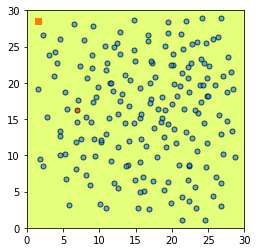

In [10]:
animate(0)
fig

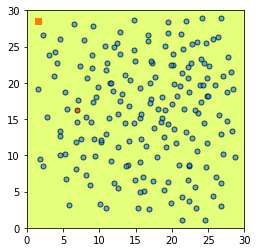

In [17]:
animate(0)
fig

In [18]:
ani = animation.FuncAnimation(fig, animate, save_count = 999999)
#ani = animation.FuncAnimation(fig, animate)
dpi = 200
writer = animation.writers['ffmpeg'](fps = 20)
# file_name = str(time.gmtime()[0:5]) + '.GIF'
file_name = str(time.gmtime()[0:5]) + '.mp4'
# ani.save( file_name ,dpi=dpi, writer = 'imagemagick')
ani.save( file_name, dpi=dpi, writer = writer)
file_name

IndexError: index 200 is out of bounds for axis 0 with size 200